In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib as mpl
import pickle
from copy import copy
from tqdm import tqdm_notebook as tqdm
from importlib import reload

import readdy_learn.example.mapk as mapk

In [2]:
activities = []
X = np.logspace(0, 5, num=100)
for N_STIMULUS in tqdm(X):
    mapk.TIMESTEP = 1e-5
    mapk.INITIAL_STATES[0][0] = N_STIMULUS
    time, count, dcount_dt = mapk.generate_lma(0, .1)
    activities.append(count[-1, -1])

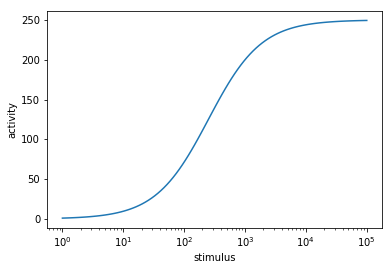

In [3]:
plt.semilogx(X, activities)
plt.xlabel('stimulus')
plt.ylabel('activity')
plt.show()

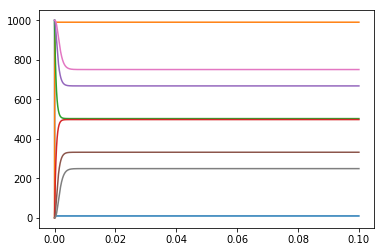

In [4]:
plt.plot(time, count[:, 1:])

In [47]:
mapk=reload(mapk)

In [48]:
data = []
for N_STIMULUS in [1e2, 1e3, 1e4]:
    mapk.TIMESTEP = 1e-5
    
    X = copy(mapk.INITIAL_STATES)
    X[0][0] = N_STIMULUS
    mapk.INITIAL_STATES = X
    time, count, dcount_dt = mapk.generate_lma(0, .003)
    # time, count, dcount_dt = mapk.generate_kmc(0, .003, n_realizations=15, njobs=5)
    data.append((time, count, dcount_dt))
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(time, count[:, 1:])
    ax2.plot(time, dcount_dt[:, 1:])
    # plt.plot(time, count[:, 1:])
    f.show()

In [49]:
time = np.concatenate([data[i][0] for i in range(len(data))])
counts = np.concatenate([data[i][1] for i in range(len(data))])
dcounts_dt = np.concatenate([data[i][2] for i in range(len(data))])

# shuffle
N = np.arange(len(time))
np.random.shuffle(N)
shuffled_time = time[N]
shuffled_counts = counts[N]
shuffled_dcounts_dt = dcounts_dt[N]

In [50]:
estimated_rateses = []
for N_BOGUS in range(0, 21):
    mapk.N_BOGUS = N_BOGUS
    mapk.RATES = np.array([
        1.,
        1000.,
        1.,
        1000.,
        1.,
        1000.,
        1.,
        1000.,
    ])
    try:
        mapk.RATES = np.concatenate((mapk.RATES, np.zeros((mapk.bogus_bfc(mapk.bfc()),))))
        estimated_rates = mapk.solve(counts, dcounts_dt, alpha=0., l1_ratio=1.)
        estimated_rateses.append(estimated_rates)
    except ValueError as e:
        print(e)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
14 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
13 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
14 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
15 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
16 / 30000 iterations
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
17 / 30000 iterations
Trying tolerance 1e-16
optimizatio

In [51]:
s_nonrel = []
for estimated_rates in estimated_rateses:
    #print(estimated_rates[:8] - mapk.RATES[:8])
    #print("***"*15)
    s_nonrel.append(np.sum(np.abs(((estimated_rates[:8] - mapk.RATES[:8]) ))))

In [52]:
s = []
for estimated_rates in estimated_rateses:
    #print((estimated_rates[:8] - mapk.RATES[:8]) / mapk.RATES[:8])
    #print("***"*15)
    s.append(np.max(np.abs(((estimated_rates[:8] - mapk.RATES[:8]) / mapk.RATES[:8]))))

In [53]:
plt.semilogy(np.arange(1, len(s)+1), s, 'x')
#plt.plot(np.arange(1, len(s)+1), s_nonrel, 'o')
plt.xticks(np.arange(1, len(s)+1))
plt.hlines([1.], 1, len(s))
# plt.vlines(np.arange(1, len(s)+1), 0, 1e3, 'grey', 'dashed')

np.abs(((estimated_rateses[0][:8] - mapk.RATES[:8]) / mapk.RATES[:8]))

In [79]:
cv_result = mapk.cv(shuffled_counts, shuffled_dcounts_dt, l1_ratios=(1.,), alphas=np.logspace(2.5, 4, num=25), 
                    n_splits=15, njobs=6)

validating across grid with 25 alphas, 1 lambdas, 1 cutoffs with 1 realizations


Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for toleranc

Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for tolerance 1e-16
Solving for toleranc

In [80]:
alphas = []
scores = []
for res in cv_result['cv_result']:
    alphas.append(res['alpha'])
    scores.append(np.mean(res['score']))
alphas = np.array(alphas)
scores = np.array(scores)
N = np.argsort(alphas)
alphas = alphas[N]
scores = scores[N]

In [81]:
%matplotlib qt
plt.semilogx(alphas, -scores)
#plt.ylim([4.447e8, 4.46e8])

In [84]:
X = np.argmin(-scores)

In [85]:
alphas[X]

421.6965034285823

In [86]:
bfc =mapk.bfc()
mapk.bogus_bfc(bfc)

8

In [87]:
RATES = np.array([
    1.,
    1000.,
    1.,
    1000.,
    1.,
    1000.,
    1.,
    1000.,
])
mapk.RATES = np.concatenate((RATES, np.zeros((mapk.N_BOGUS,))))

In [88]:
estimated_rates = mapk.solve(counts, dcounts_dt, alpha=alphas[X], l1_ratio=1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=421.6965034285823, lambda=1.0)!
status 0: Optimization terminated successfully.
22 / 30000 iterations


In [89]:
-np.sort(-np.abs(((estimated_rates[:8] - mapk.RATES[:8]) / mapk.RATES[:8])))

array([0.27721306, 0.01050332, 0.00862906, 0.00404381, 0.00292371,
       0.00057347, 0.00054221, 0.0003029 ])

In [90]:
estimated_rates = mapk.solve(counts, dcounts_dt, alpha=0, l1_ratio=1.)

Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0, lambda=1.0)!
status 0: Optimization terminated successfully.
21 / 30000 iterations


In [91]:
-np.sort(-np.abs(((estimated_rates[:8] - mapk.RATES[:8]) / mapk.RATES[:8])))

array([2.49018679e-01, 1.05021623e-02, 8.62863328e-03, 5.54867604e-04,
       5.29518123e-04, 1.11964732e-04, 7.39761643e-05, 1.30372199e-05])

In [16]:
estimated_rates

array([ 9.91371044e-01,  9.89496972e+02,  9.99455822e-01,  9.99206189e+02,
        7.67234265e-01,  9.75547750e+02,  7.56833775e-01,  5.78850166e+02,
        2.37761448e-04,  2.37981604e-01,  2.01302884e-01,  2.37490330e-01,
        2.04182798e-01, -2.37920287e-01,  2.03394233e-01,  1.69219547e-01,
       -4.04724344e-01,  1.24116303e-03, -2.11668765e-02, -4.17673185e-02,
        5.90881176e-02, -4.82711869e-01,  1.18363528e+00])

In [53]:
tuples = tuple((i, j) for i in range(1, 9) for j in range(9) if j > i)

In [54]:
pairs = tuple((tuples[i], tuples[j]) for i in range(len(tuples)) for j in range(len(tuples)) if j != i
             and tuples[i][0] == tuples[j][0] and tuples[i][1] - tuples[j][1] == -1 and tuples[i][1] % 2 == 1)

In [55]:
pairs = [(pairs[i][0], pairs[i][1]) for i in range(len(pairs))] 
        + [(pairs[i][1], pairs[i][0]) for i in range(len(pairs))]

In [56]:
pairs

[((1, 3), (1, 4)),
 ((1, 5), (1, 6)),
 ((1, 7), (1, 8)),
 ((2, 3), (2, 4)),
 ((2, 5), (2, 6)),
 ((2, 7), (2, 8)),
 ((3, 5), (3, 6)),
 ((3, 7), (3, 8)),
 ((4, 5), (4, 6)),
 ((4, 7), (4, 8)),
 ((5, 7), (5, 8)),
 ((6, 7), (6, 8)),
 ((1, 4), (1, 3)),
 ((1, 6), (1, 5)),
 ((1, 8), (1, 7)),
 ((2, 4), (2, 3)),
 ((2, 6), (2, 5)),
 ((2, 8), (2, 7)),
 ((3, 6), (3, 5)),
 ((3, 8), (3, 7)),
 ((4, 6), (4, 5)),
 ((4, 8), (4, 7)),
 ((5, 8), (5, 7)),
 ((6, 8), (6, 7))]